In [1]:
import pymc3 as pm
import sys
sys.path.append('..')
from src.utils import *
from src.params import *
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

In [3]:
df, basin_idx, basins, coords = read_data(file_dir='../data/hierarchical_septics_v4.csv',
        cols=['ppt_2021', 'hydraulic_c', 'median_hse', 'dem'], is_balanced=True)

balancing...
non-repairs: 15.574291158976727%, repairs: 84.42570884102327%


/Users/juannat/Documents/research/septic/bayesian_septic/notebooks/../src/utils.py:76: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_dir)


# Check Empirical Distribution

Precipitation

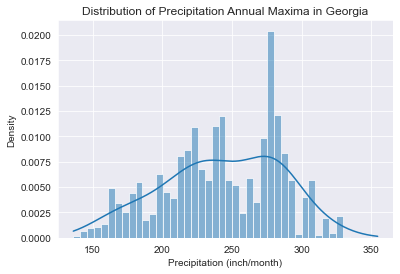

In [4]:
ax = sns.histplot(data=df, x='ppt_2021', stat="density", kde=True, kde_kws={'bw_adjust':3})
ax.set_title('Distribution of Precipitation Annual Maxima in Georgia')
ax.set_xlabel('Precipitation (inch/month)')
plt.savefig('../docs/precip_dist.pdf', dpi=300)

Distance to water bodies

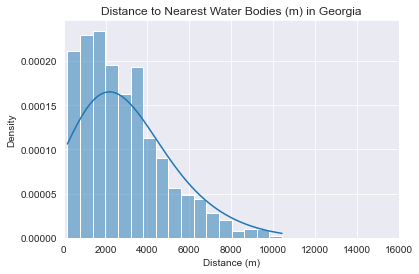

In [5]:
ax = sns.histplot(data=df, x='water_dist', stat="density", kde=True, kde_kws={'bw_adjust':3})
ax.set_title('Distance to Nearest Water Bodies (m) in Georgia')
ax.set_xlabel('Distance (m)')
ax.set_xlim([0,16000])
plt.savefig('../docs/wtr_dist.pdf', dpi=300)

Median Housing Values

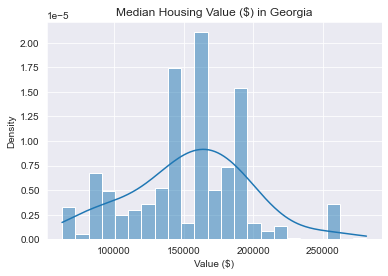

In [6]:
ax = sns.histplot(data=df, x='median_hse', stat="density", kde=True, kde_kws={'bw_adjust':2})
ax.set_title('Median Housing Value ($) in Georgia')
ax.set_xlabel('Value ($)')
plt.savefig('../docs/hse_dist.pdf', dpi=300)

Soil Hydraulics

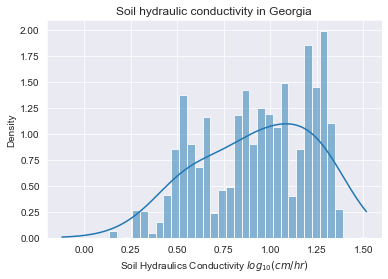

In [11]:
ax = sns.histplot(data=df, x='hydraulic_c', stat="density", kde=True, kde_kws={'bw_adjust':4})
ax.set_title('Soil hydraulic conductivity in Georgia')
ax.set_xlabel('Soil Hydraulics Conductivity $log_{10}(cm/hr)$')
plt.savefig('../docs/hydr_dist.pdf', dpi=300)

DEM

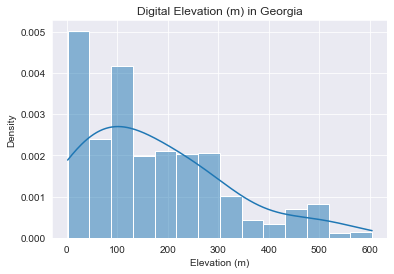

In [7]:
ax = sns.histplot(data=df, x='dem', stat="density", kde=True, kde_kws={'bw_adjust':2})
ax.set_title('Digital Elevation (m) in Georgia')
ax.set_xlabel('Elevation (m)')
plt.savefig('../docs/dem_dist.pdf', dpi=300)

### Normalized Version

Precipitation

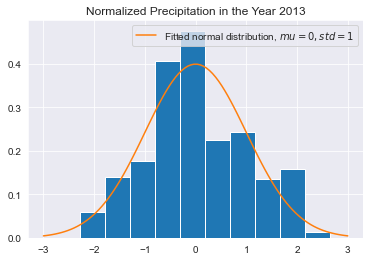

In [7]:
# plotting
x = np.linspace(-3,3,100)
y = stats.norm.pdf(x, loc=0., scale=1.)
df['ppt_2013_norm'].hist(density=True)
plt.title("Normalized Precipitation in the Year 2013")
plt.plot(x,y, label="Fitted normal distribution, $mu=0, std=1$")
plt.legend()

Distance to water bodies

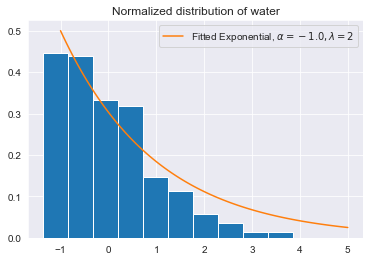

In [8]:
# plotting distribution (using Gamma distribution with alpha=1 or exponential decay)
x = np.linspace(-1,5,100)
y = stats.expon.pdf(x, loc=-1.,scale=2)
df['water_dist_norm'].hist(density=True)
plt.plot(x,y, label="Fitted Exponential, $\\alpha=-1.0, \lambda=2.$")
plt.title("Normalized distribution of water")
plt.legend()

Hydraulic Conductivity

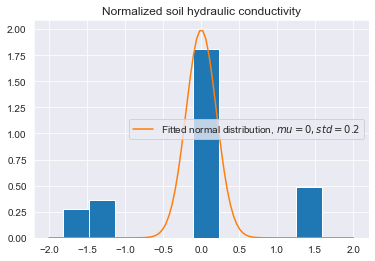

In [9]:
# plotting distribution (using Gamma distribution with alpha=1 or exponential decay)
x = np.linspace(-2,2,100)
y = stats.norm.pdf(x, loc=0., scale=0.2)
df['hydraulic_c_norm'].hist(density=True)
plt.plot(x,y, label="Fitted normal distribution, $mu=0, std=0.2$")
plt.title("Normalized soil hydraulic conductivity")
plt.legend()

Median housing values

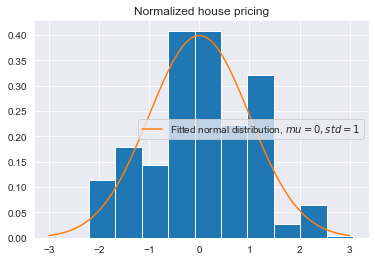

In [10]:
# plotting distribution (using Normal distribution)
x = np.linspace(-3,3,100)
y = stats.norm.pdf(x, loc=0, scale=1)
df['median_hse_norm'].hist(density=True)
plt.plot(x,y, label="Fitted normal distribution, $mu=0, std=1$")
plt.title("Normalized house pricing")
plt.legend()

DEM

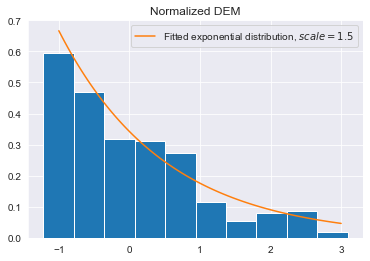

In [11]:
# plotting distribution (using Normal distribution)
x = np.linspace(-1,3,100)
y = stats.expon.pdf(x, loc=-1, scale=1.5)
df['dem_norm'].hist(density=True)
plt.plot(x,y, label="Fitted exponential distribution, $scale= 1.5$")
plt.title("Normalized DEM")
plt.legend()